Experiment 5

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

11493376/11490434 [==============================] - 0s 0us/step
X_train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0

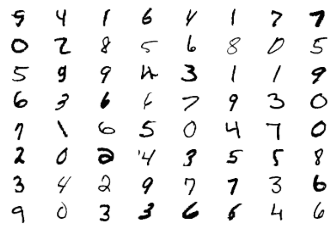

In [3]:
(x_train, y_train) , (x_test , y_test) = mnist.load_data()
x_train_drawing = x_train
print("X_train:" , x_train[0])
print("Y_train:" , y_train[0])
print("X_train shape:" , x_train.shape)
print("Y_train shape:" , y_train.shape)



image_size = 784 #28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size)
x_test = x_test.reshape(x_test.shape[0] , image_size)
print("After reshaping")
print("X_Train Shape:", x_train.shape)
print("X_Test Shape:", x_test.shape)


#Converting Class vectors to Binary Class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train , num_classes)

y_test = keras.utils.to_categorical(y_test , num_classes)
print(y_train.shape)
print(y_train[0])

for i in range(64):
  ax = plt.subplot(8 , 8 , i+1)
  ax.axis('off')
  plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap = 'Greys')

In [4]:
model = Sequential()
model.add(Dense(units = 128, activation = 'sigmoid' , input_shape = (image_size,)))
model.add(Dense(units = 128, activation = 'sigmoid' , input_shape = (image_size,)))
model.add(Dense(units = 128, activation = 'sigmoid' , input_shape = (image_size,)))
model.add(Dense(units = 128, activation = 'sigmoid' , input_shape = (image_size,)))
model.add(Dense(units = 10, activation = 'sigmoid' , input_shape = (image_size,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer = "sgd" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(x_train ,  y_train, batch_size = 128 , epochs =100 , verbose = True , validation_split = .1)

Epoch 1/100
422/422 [==============================] - 3s 5ms/step - loss: 2.3124 - accuracy: 0.1136 - val_loss: 2.2986 - val_accuracy: 0.1050
Epoch 2/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2970 - accuracy: 0.1162 - val_loss: 2.2957 - val_accuracy: 0.1050
Epoch 3/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2941 - accuracy: 0.1182 - val_loss: 2.2919 - val_accuracy: 0.1050
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2904 - accuracy: 0.1220 - val_loss: 2.2876 - val_accuracy: 0.1050
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2857 - accuracy: 0.1302 - val_loss: 2.2831 - val_accuracy: 0.1052
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2797 - accuracy: 0.1426 - val_loss: 2.2756 - val_accuracy: 0.1100
Epoch 7/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2742 - accuracy: 0.1635 - val_loss: 2.2674 - val_accuracy: 0.1637

In [6]:
loss , accuraacy = model.evaluate(x_test, y_test , verbose = True )

313/313 [==============================] - 0s 1ms/step - loss: 0.2124 - accuracy: 0.9418


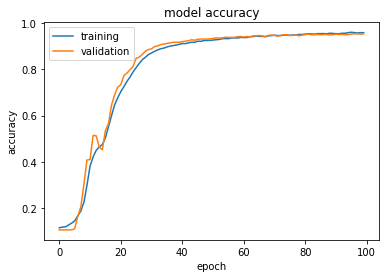

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()